In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
import sklearn

In [51]:
from sklearn.decomposition import PCA

In [52]:
model=PCA(n_components=1) #,whiten=True)

In [53]:
import pandas as pd

In [54]:
import codecs
from datetime import datetime as dt

root = '/Users/alehmann/Documents/Documents/HIH/BDA/BDA2017/data/'
def read_energi_data(f):
    with codecs.open(root+f,encoding='8859') as f:
        col = []
        l=f.readline().strip()
        while l:
            col.append(' '.join(l.split()[1:]))
            l=f.readline().strip()
        
        dat = pd.read_csv(f,sep=';', skipinitialspace=True,
                        lineterminator ='\n',
                        infer_datetime_format=True)
        dat = dat.drop(dat.columns[-1],1) # remove extraneous last column
        dat[dat.columns[0]] = pd.to_datetime(dat[dat.columns[0]],
                                             format=
                                             "%Y-%m-%d %H:%M ")
        dat.columns = [dat.columns[0]] + col
        dat = dat.set_index(dat.columns[0])
    return dat



In [55]:
energi = read_energi_data('20161208_onlinedata.txt')
co2 = energi['CO2 udledning']
print(co2.groupby(co2.index.hour).mean())
print(co2.groupby(co2.index.hour).max())


Dato og tid      
0     170.916667
1     165.583333
2     164.000000
3     155.833333
4     163.750000
5     168.750000
6     172.333333
7     193.416667
8     209.500000
9     199.416667
10    194.250000
11    204.083333
12    200.250000
13    212.583333
14    233.000000
15    245.666667
16    243.333333
17    250.916667
18    279.166667
19    292.833333
20    289.750000
21    301.000000
22    286.333333
23    292.250000
Name: CO2 udledning, dtype: float64
Dato og tid      
0     190
1     169
2     166
3     157
4     166
5     173
6     180
7     197
8     303
9     206
10    200
11    208
12    203
13    224
14    244
15    250
16    249
17    264
18    285
19    297
20    295
21    304
22    298
23    299
Name: CO2 udledning, dtype: int64


In [56]:
energi=energi.drop(['Temperatur i Malling','Vindhastighed i Malling'],axis=1)
energi=energi.drop('CO2 udledning',axis=1)
#energi=energi.drop('Havmøller DK',axis=1)
#energi=energi.drop('Landmøller DK',axis=1)

In [9]:
energi=energi.drop('CO2 udledning',axis=1)
energi=energi.drop('Havmøller DK',axis=1)
energi=energi.drop('Landmøller DK',axis=1)

In [57]:
res = model.fit(energi)
res = res.transform(energi)

In [58]:
print(res.shape,energi.shape)

(288, 1) (288, 17)


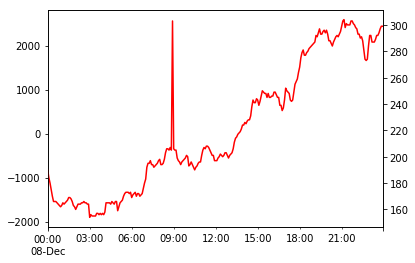

In [80]:
fig,ax = plt.subplots()

ax.plot(res) #plt.scatter(res[:,0],res[:,1])
ax2 = ax.twinx()
co2.plot(color='r')


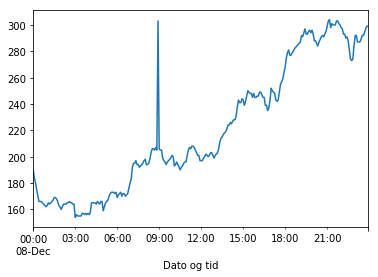

In [69]:
co2.plot()


In [81]:
model.explained_variance_ratio_

array([ 0.79257213])

In [14]:
np.sort(list(zip(model.components_[0],energi.columns)),axis=1)

array([['0.139389241952', 'Centrale kraftværker DK1'],
       ['0.0122298922639', 'Centrale kraftværker DK2'],
       ['0.0678999524955', 'Decentrale kraftværker DK1'],
       ['0.0166243846851', 'Decentrale kraftværker DK2'],
       ['-0.443890104834', 'Vindmøller DK1'],
       ['-0.0735127849995', 'Vindmøller DK2'],
       ['0.774768309303', 'Udveksling Jylland-Norge'],
       ['-0.0992271662968', 'Udveksling Jylland-Sverige'],
       ['-0.177258309211', 'Udveksling Jylland-Tyskland'],
       ['0.349469097553', 'Udveksling Sjælland-Sverige'],
       ['-0.0970749527157', 'Udveksling Sjælland-Tyskland'],
       ['0.00179653791589', 'Udveksling Bornholm-Sverige'],
       ['-0.00179277858836', 'Udveksling Fyn-Sjaelland'],
       ['0.00075482123539', 'Solceller DK1'],
       ['0.000246488301845', 'Solceller DK2']], 
      dtype='<U32')

In [15]:
a=list(zip(model.components_[0],energi.columns))

In [16]:
a.sort()
a

[(-0.44389010483378, 'Vindmøller DK1'),
 (-0.17725830921129238, 'Udveksling Jylland-Tyskland'),
 (-0.099227166296758221, 'Udveksling Jylland-Sverige'),
 (-0.097074952715711413, 'Udveksling Sjælland-Tyskland'),
 (-0.073512784999469602, 'Vindmøller DK2'),
 (-0.0017927785883600034, 'Udveksling Fyn-Sjaelland'),
 (0.00024648830184538349, 'Solceller DK2'),
 (0.00075482123539010815, 'Solceller DK1'),
 (0.0017965379158941335, 'Udveksling Bornholm-Sverige'),
 (0.012229892263924461, 'Centrale kraftværker DK2'),
 (0.016624384685136596, 'Decentrale kraftværker DK2'),
 (0.067899952495542593, 'Decentrale kraftværker DK1'),
 (0.13938924195222677, 'Centrale kraftværker DK1'),
 (0.34946909755271283, 'Udveksling Sjælland-Sverige'),
 (0.77476830930316887, 'Udveksling Jylland-Norge')]

In [17]:
from sklearn.svm import SVR

In [32]:
svr_model = SVR(kernel='linear')
svr_model_non = SVR(kernel='rbf')

In [33]:
svr_model.fit(energi,co2)
svr_model_non.fit(energi,co2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
predict = svr_model.predict(energi)
predict_non = svr_model_non.predict(energi)

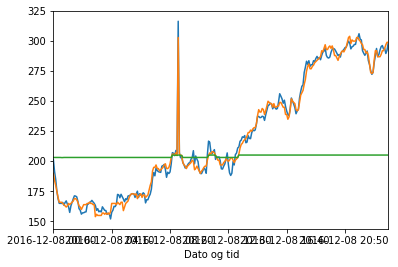

In [35]:
plot(predict)
co2.plot()
plot(predict_non)

In [39]:
svr_model.score(energi,co2)

0.99228069160613075

In [40]:
svr_model_non.score(energi,co2)

-0.075383054655297155